## Observations and Insights 

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata.head()
#study_results.head()

# Combine the data into a single dataset
mouse_study_combined = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
mouse_study_combined


In [2]:
# Checking the number of mice.
unique_mice = mouse_study_combined['Mouse ID'].unique()
mouse_total = len(unique_mice)
mouse_total


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# check to see if there are duplicates for Mouse ID and Timepoint
dup = mouse_study_combined.duplicated(subset=['Mouse ID','Timepoint']).any()


# mouse_study_combined['Mouse ID'].value_counts()
# Found the duplicate mouse is g989

dup


True

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# set index to Mouse ID
mouse_data = mouse_study_combined.set_index('Mouse ID')
# check mouse data for ID g989
g989 = mouse_data.loc['g989',:]
g989

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# drop everything associated with Mouse ID g989
mouse_study_combined.drop(mouse_study_combined[mouse_study_combined['Mouse ID'] == 'g989'].index, inplace = True)
print(mouse_study_combined)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [6]:
# check to see if there are remaining duplicates for Mouse ID and Timepoint
duplicate = mouse_study_combined.duplicated(subset=['Mouse ID','Timepoint']).any()
duplicate

False

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(mouse_study_combined['Mouse ID'].unique())
mouse_count

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# variable to hold Tumor Volume Data grouped by Drug Regimen
tumor_volume = mouse_study_combined.groupby(['Drug Regimen'])['Tumor Volume (mm3)']

# variable to hold the Mean Tumor Volume Data Grouped by Drug Regimen
mean_tumor_volume = tumor_volume.mean()
#mean_tumor_volume

# variable to hold median Tumor Volume Data Grouped by Drug Regimen
median_tumor_volume = tumor_volume.median()
#median_tumor_volume

# variable to hold the Tumor Volume Variance Data Grouped by Drug Regimen
var_tumor_volume = tumor_volume.var()
#var_tumor_volume

# variable to hold the Tumor Volume Standard Deviation Data Grouped by Drug Regimen
stdev_tumor_volume = tumor_volume.std()
#stdev_tumor_volume

# variable to hold the Tumor Volume SEM Data Grouped by Drug Regimen
sem_tumor_volume = tumor_volume.sem()
#sem_tumor_volume

# Convert to DataFrame
drug_tumor_summary = pd.DataFrame({
                                "Mean Tumor Volume" : mean_tumor_volume, 
                                "Median Tumor Volume" : median_tumor_volume, 
                                "Tumor Volume Variance" : var_tumor_volume,
                                "Tumor Volume Stdev" : stdev_tumor_volume,
                                "Tumor Volume SEM" : sem_tumor_volume})

# Preview DataFrame
drug_tumor_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Stdev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_tumor_volume = mouse_study_combined.groupby('Drug Regimen').agg(
        Mean_Tumor_Volume = ('Tumor Volume (mm3)', np.mean),
        Median_Tumor_Volume = ('Tumor Volume (mm3)', np.median),
        Variance_Tumor_Volume = ('Tumor Volume (mm3)', np.var),
        Stdev_Tumor_Volume = ('Tumor Volume (mm3)', np.std),
        SEM_Tumor_Volume = ('Tumor Volume (mm3)', st.sem)
)

drug_tumor_volume

,Mean_Tumor_Volume,Median_Tumor_Volume,Variance_Tumor_Volume,Stdev_Tumor_Volume,SEM_Tumor_Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# list of unique drug regimens
drug_regimen = mouse_study_combined['Drug Regimen'].unique()

# drug regimen as x-axis values for plotting
x_axis = np.arange(len(drug_regimen))

# drop all duplicate mice
no_dupe_mice = mouse_study_combined.drop_duplicates(subset=['Mouse ID'])


# get mice counts per drug
drug_counts = no_dupe_mice["Drug Regimen"].value_counts()
#drug_counts
no_dupe_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


Text(0, 0.5, 'Mice Count')

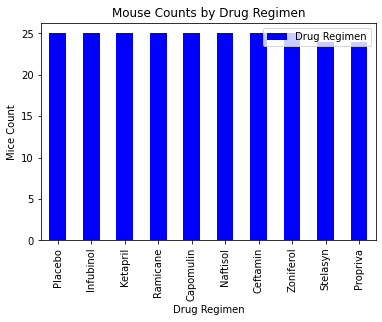

In [12]:
# plot the mouse counts for each drug using pandas
plot_drug = pd.DataFrame({"Drug Regimen": drug_counts})
plot_drug.plot(kind="bar", color='blue', title="Mouse Counts by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")

In [13]:
# Placeholder for drug list 
# ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']

Text(0, 0.5, 'Mice Count')

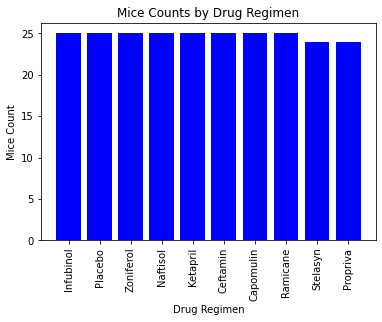

In [23]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
# plot the bar graph of mice count per drug regimen
plt.bar(x_axis, drug_counts , color='blue', align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Infubinol', 'Placebo', 'Zoniferol', 'Naftisol', 'Ketapril',
       'Ceftamin', 'Capomulin', 'Ramicane', 'Stelasyn', 'Propriva'], rotation = 90)
plt.title("Mice Counts by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")



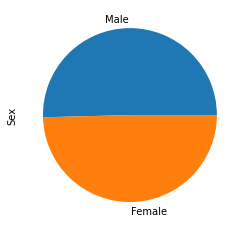

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
no_dupe_mice['Sex'].value_counts().plot.pie()


([<matplotlib.patches.Wedge at 0x172ab3ab910>,
 [Text(-0.013934097579311132, 1.0999117423341975, 'Male'),
  Text(0.013934097579310996, -1.0999117423341975, 'Female')])

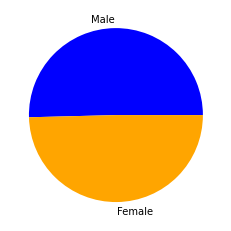

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pies = ["Male", "Female"]
mouse_sex = no_dupe_mice["Sex"].value_counts()
colors = ["blue", "orange"]
explode = (0.1, 0)
#mouse_sex
plt.pie(mouse_sex, labels=pies, colors=colors)

## Quartiles, Outliers and Boxplots

In [17]:
# for display purposes to see the data
mouse_study_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# set drug regimen as index and drop associated regimens while only keeping Capomulin, Ramicane, Infubinol, and Ceftamin
included_drugs = mouse_study_combined.set_index('Drug Regimen')
included_drugs = included_drugs.drop(['Placebo', 'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'])

# isolated view of just capomulin for later use
capomulin = included_drugs.drop(['Ramicane', 'Infubinol','Ceftamin'])

# Reset index so drug regimen column persists after inner merge
included_drugs = included_drugs.reset_index()

# get mouse count per drug
mouse_d = included_drugs.groupby('Drug Regimen')['Mouse ID'].unique()
#mouse_d

# Start by getting the last (greatest) timepoint for each mouse
max_time = included_drugs.groupby('Mouse ID')['Timepoint'].max()

included_drugs


,Drug Regimen,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Ramicane,k403,Male,21,16,0,45.000000,0
1,Ramicane,k403,Male,21,16,5,38.825898,0
2,Ramicane,k403,Male,21,16,10,35.014271,1
3,Ramicane,k403,Male,21,16,15,34.223992,1
4,Ramicane,k403,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
809,Infubinol,z581,Female,24,25,25,54.316407,2
810,Infubinol,z581,Female,24,25,30,56.286750,2
811,Infubinol,z581,Female,24,25,35,58.628399,3
812,Infubinol,z581,Female,24,25,40,60.053740,3


In [19]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(included_drugs, max_time, on=["Mouse ID", "Timepoint"])
# show all rows of data
pd.set_option('display.max_rows', merge_df.shape[0]+1)
# set index as Mouse ID
merge_df = merge_df.set_index('Mouse ID')
merge_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,45,22.050126,1
s185,Capomulin,Female,3,17,45,23.343598,1
x401,Capomulin,Female,16,15,45,28.484033,0
m601,Capomulin,Male,22,17,45,28.430964,1
g791,Ramicane,Male,11,16,45,29.128472,1
s508,Ramicane,Male,1,17,45,30.276232,0
f966,Capomulin,Male,16,17,20,30.485985,0
m546,Ramicane,Male,18,16,45,30.564625,1
z578,Ramicane,Male,11,16,45,30.638696,0


In [35]:
# Put treatments into a list for for loop (and later for plot labels)
#set drugs to be analyzed, colors for the plots, and markers
drugs = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
colors = ["red", "blue", "green", "yellow"]
markers = ["o","^","s","d"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []




In [36]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = merge_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
tumor_data = merge_df[['Drug Regimen', 'Tumor Volume (mm3)']]
tumor_data
    
   
    

,Drug Regimen,Tumor Volume (mm3)
Mouse ID,,
k403,Ramicane,22.050126
s185,Capomulin,23.343598
x401,Capomulin,28.484033
m601,Capomulin,28.430964
g791,Ramicane,29.128472
s508,Ramicane,30.276232
f966,Capomulin,30.485985
m546,Ramicane,30.564625
z578,Ramicane,30.638696


In [37]:
print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume is: 37.187743802499995
The upper quartile of Tumor Volume is: 59.930261755000004
The interquartile range of Tumor Volume is: 22.74251795250001
The the median of Tumor Volume is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


In [38]:
    # add subset 
capo = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin", :]
rami = merge_df.loc[merge_df["Drug Regimen"] == "Ramicane", :]
infu = merge_df.loc[merge_df["Drug Regimen"] == "Infubinol", :]
ceft = merge_df.loc[merge_df["Drug Regimen"] == "Ceftamin", :]

# tumor volumes for each Drug Regimen
capo_tumor_v = capo['Tumor Volume (mm3)'].tolist()
rami_tumor_v = rami['Tumor Volume (mm3)']
infu_tumor_v = infu['Tumor Volume (mm3)']
ceft_tumor_v = ceft['Tumor Volume (mm3)']

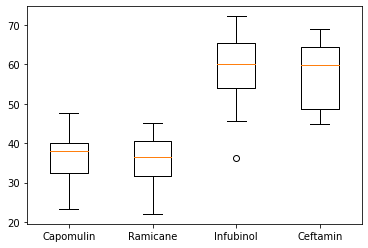

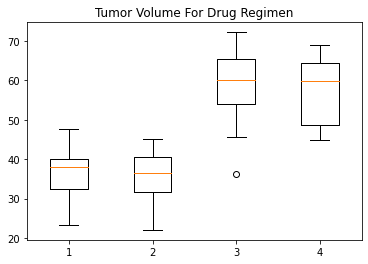

In [41]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

drug_list = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
drug_list_df = pd.DataFrame(drug_list)
drug_list_df = drug_list_df.reindex(drugs)
#drug_list_df

tumor_vol_data = [vol for vol in drug_list_df['Tumor Volume (mm3)']]
#tumor_vol_data

data = tumor_vol_data
plt.boxplot(tumor_vol_data, labels=drugs)
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume For Drug Regimen')
ax1.boxplot(tumor_vol_data)
plt.show()




## Line and Scatter Plots

In [42]:
# view data for Capomulin Drug Regimen
capomulin


,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,s185,Female,3,17,0,45.000000,0
Capomulin,s185,Female,3,17,5,43.878496,0
Capomulin,s185,Female,3,17,10,37.614948,0
Capomulin,s185,Female,3,17,15,38.177232,0
Capomulin,s185,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...
Capomulin,i557,Female,1,24,45,47.685963,1
Capomulin,r157,Male,22,25,0,45.000000,0
Capomulin,r157,Male,22,25,5,45.597064,0


In [43]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#change index to mouse ID 
capomulin = capomulin.set_index('Mouse ID')

#remove other mouse IDs so only s185 shows
capo_s185 = capomulin.drop(['x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'])




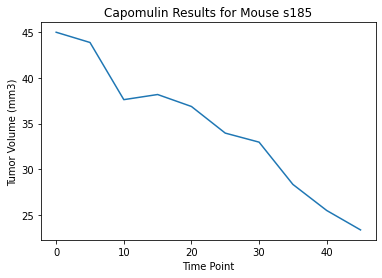

In [44]:
#set the x-axis equal to the Timepoint and y-axis to Tumor Volume
x_axis = capo_s185['Timepoint']
tumor_vol_capo = capo_s185['Tumor Volume (mm3)']

plt.plot(x_axis, tumor_vol_capo)
plt.title("Capomulin Results for Mouse s185")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


Text(0.5, 1.0, 'Tumor Volume Average vs Mouse Weight')

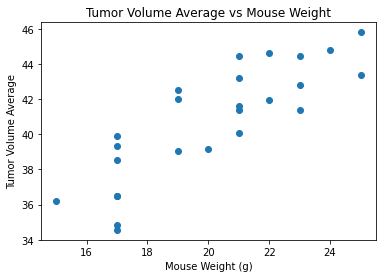

In [45]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# group by mouse ID to find average tumor volume
capomulin_tumor_avg = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
#capomulin_tumor_avg

# establish x-axis value for the weight of the mice
mouse_weight = capomulin.groupby('Mouse ID')['Weight (g)'].mean()


# produce scatter plot of the data
plt.scatter(mouse_weight, capomulin_tumor_avg)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume Average")
plt.title("Tumor Volume Average vs Mouse Weight")

## Correlation and Regression

The correlation between both factors is 0.84


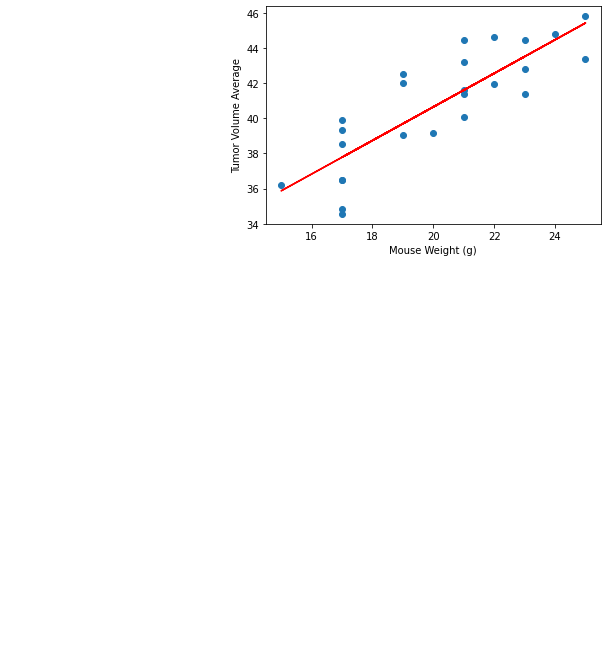

In [46]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#establish x and y values and find St. Pearson Correlation Coefficient for Mouse Weight and Tumor Volume Avg
x_values = mouse_weight
y_values = capomulin_tumor_avg
correlation = st.pearsonr(mouse_weight, capomulin_tumor_avg)

#print St. Pearson Correlation Coefficient
print(f"The correlation between both factors is {round(correlation[0],2)}")

# establish linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# linear regression line 
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# scatter plot of the data
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume Average')
plt.show()
